# Basic

In [ ]:
import torch

In [ ]:
# Scalar
a = torch.tensor(5)
print(a)

tensor(5)


In [ ]:
# Vector
b = torch.tensor([1, 2, 3])
print(b)

tensor([1, 2, 3])


In [ ]:
# Matrix
c = torch.tensor([[1, 2],
                  [3, 4]])
print(c)

tensor([[1, 2],
        [3, 4]])


In [ ]:
import torch

x = torch.tensor([1, 2, 3])
print(x.dtype)  # torch.int64 by default for integers

y = torch.tensor([1.0, 2.0, 3.0])
print(y.dtype) # torch.float32 by default for floats

torch.int64
torch.float32


In [ ]:
# Tensor Properties

print(c.shape)      # size
print(c.dtype)      # data type
print(c.device)     # cpu or gpu

torch.Size([2, 2])
torch.int64
cpu


In [ ]:
# CHECK IF GPU IS AVAILABLE

torch.cuda.is_available()

True

In [ ]:
# Selecting Device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

torch.cuda.get_device_name(0)
# torch.cuda.device_count()

cuda


'Tesla T4'

In [ ]:
# MOVE TENSOR TO DEVICE
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.tensor([1, 2, 3])
x = x.to(device)

print(x.device)

# MOVE MODEL TO DEVICE

# model = MyModel()
# model = model.to(device)

cuda:0


In [ ]:
# FULL STANDARD TEMPLATE

# import torch

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # model
# model = MyModel().to(device)

# # data
# inputs = inputs.to(device)
# labels = labels.to(device)

# # training
# outputs = model(inputs)
# loss = criterion(outputs, labels)

# -------------------------------------
# WHY DEVICE SELECTION MATTERS

# Forget .to(device) → runtime error

# CPU training → very slow

# GPU mismatch → crash

# Every PyTorch bug beginner faces = device mismatch
# -------------------------------------

# device = "cuda"

# x = torch.rand(3, 3)
# y = torch.rand(3, 3).to(device)

# z = x + y   # error

In [ ]:
# Common Tensor Creation

torch.zeros(3, 4)
# torch.ones(2, 2)
# torch.rand(3, 3)
# torch.randn(3, 3)   # normal distribution

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# NumPy vs PyTorch

import numpy as np

np_array = np.array([1, 2, 3])
torch_tensor = torch.from_numpy(np_array)
torch_tensor

tensor([1, 2, 3])

In [ ]:
# x = torch.rand(2, 3)
# y = torch.rand(3, 2)
# x + y # error (size nismatch)

x = torch.rand(2, 3)
y = torch.rand(2, 3)
x + y

tensor([[1.0947, 1.1413, 0.1232],
        [0.7518, 0.8889, 1.1640]])

# Tensor operations, indexing & broadcasting

In [ ]:
# 1. BASIC TENSOR OPERATIONS

import torch

a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print(a + b)
print(a - b)
print(a * b)
print(a / b)

tensor([5., 7., 9.])
tensor([-3., -3., -3.])
tensor([ 4., 10., 18.])
tensor([0.2500, 0.4000, 0.5000])


In [ ]:
# Mismatch error example
x = torch.tensor([1.0,2.0])
y = torch.tensor([1,2])
print(x + y)  # Error: float + int

# Solution: cast tensors to same dtype
y = y.float()

# CHANGE DTYPE
x = torch.tensor([1, 2, 3])
x = x.float()     # to float32
x = x.double()    # to float64
x = x.long()      # to int64

tensor([2., 4.])


In [ ]:
# 2. SCALAR OPERATIONS

x = torch.tensor([1, 2, 3])

print(x + 2)
print(x * 3)

tensor([3, 4, 5])
tensor([3, 6, 9])


In [ ]:
# 3. MATRIX MULTIPLICATION (VERY IMPORTANT)

# Wrong (element-wise):
A = torch.rand(2, 3)
B = torch.rand(3, 2)

# A * B    # ERROR

# Correct (matrix multiplication):

torch.matmul(A, B)
# or
A @ B

tensor([[0.6847, 1.0395],
        [1.0930, 1.3131]])

In [ ]:
# 4. RESHAPING TENSORS

# What they are
# Both change the shape of a tensor without changing data.
# Difference
# view() → works only if memory is contiguous
# reshape() → safer, works even if memory is not contiguous
# In simple words
# view() = “reshape if possible”
# reshape() = “reshape no matter what”
# Use reshape() in practice

x = torch.rand(2, 3)
print(x)
y = x.view(3, 2) # view() needs contiguous memory
print(y)

y = x.reshape(3, 2) # Safer than view
print(y)


tensor([[0.7829, 0.3784, 0.7882],
        [0.6629, 0.6213, 0.1066]])
tensor([[0.7829, 0.3784],
        [0.7882, 0.6629],
        [0.6213, 0.1066]])
tensor([[0.7829, 0.3784],
        [0.7882, 0.6629],
        [0.6213, 0.1066]])


In [ ]:
# 5. UNSQUEEZE & SQUEEZE
# unsqueeze
# Adds a dimension of size 1
# Example meaning:
# Vector → Row / Column
# Needed for batching & model input
# Think:
# “I need one more bracket”

# brackets = dimensions

# [  [ 1,  2,  3 ]  ]
#  ↑        ↑
#  row     columns

x = torch.tensor([1, 2, 3])
print(x)

x = x.unsqueeze(0)  # shape: (1,3)
print(x)

x = x.unsqueeze(1)  # shape: (3,1)
print(x)

# Remove dimension
x = x.squeeze()
print(x)

# squeeze
# Removes dimension(s) of size 1
# Example meaning:
# Model output cleanup
# Removing useless dimensions
# Think:
# “Remove extra bracket”

tensor([1, 2, 3])
tensor([[1, 2, 3]])
tensor([[[1, 2, 3]]])
tensor([1, 2, 3])


In [ ]:
# 6. INDEXING & SLICING

x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

print(x[0])        # first row
print(x[:, 1])     # second column
print(x[0, 2])     # element

tensor([1, 2, 3])
tensor([2, 5])
tensor(3)


In [ ]:
# 7. BOOLEAN MASKING

x = torch.tensor([1, 5, 3, 8, 2])

mask = x > 3
print(x[mask])

tensor([5, 8])


In [ ]:
# 8. BROADCASTING

x = torch.rand(2, 3)
b = torch.rand(3)

y = x + b
print(y)

# # PyTorch automatically expands smaller tensor.
# A = torch.rand(4, 3)
# b = torch.tensor([1, 2, 3])   # shape (3)

# A → (4, 3)
# b → (3)

# PyTorch auto-expands b to:
# [[1, 2, 3],
#  [1, 2, 3],
#  [1, 2, 3],
#  [1, 2, 3]]

tensor([[1.3838, 1.5899, 1.2411],
        [1.1905, 1.6917, 1.3243]])


# AUTOGRAD & BACKPROPAGATION (CORE CONCEPT) - Heart of PyTorch

WHAT IS AUTOGRAD?

Autograd is PyTorch’s automatic differentiation engine. It automatically computes gradients:


You do not write derivative formulas.

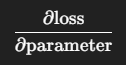

WHY DO WE NEED GRADIENTS?

Training a neural network means:

-> Change weights

-> To reduce loss

-> Using gradients

-> Gradient tells:

“Which direction should weights move to reduce error”

In [ ]:
# requires_grad=True
# Meaning: “Track all operations on x for backprop”
# Only tensors with requires_grad=True get gradients.

import torch

x = torch.tensor(2.0, requires_grad=True)
print(x)

tensor(2., requires_grad=True)


In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x * 3
z = y ** 2

# Graph: x → y → z
# PyTorch remembers every operation.

In [ ]:
# BACKPROPAGATION: .backward()

z.backward()
print(x.grad)

tensor(36.)


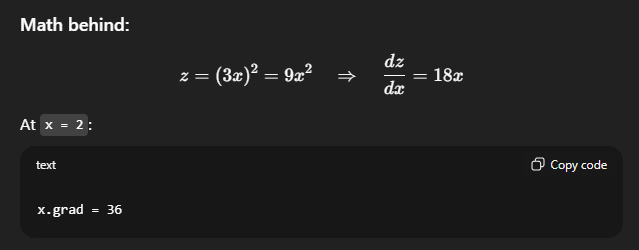

-> GRADIENT IS STORED IN .grad

-> Gradient stored in leaf tensors

-> x.grad holds result

-> Intermediate tensors don’t keep gradients by default

In [ ]:
# # GRADIENT ACCUMULATION (BIG SOURCE OF BUGS)

z.backward()
z.backward()
print(x.grad)

# # Gradients add up

# # So in training this is mandatory.

optimizer.zero_grad()

In [ ]:
# SCALAR RULE: .backward() works only on scalars

y = x * 3
y.backward() # Wrong

# Correct:

y.sum().backward()

In [ ]:
# TURN OFF AUTOGRAD (INFERENCE)

with torch.no_grad():
    y = model(x)

# Why?
# Faster
# Less memory
# No gradients needed

# Because we don’t want PyTorch to track weight updates in the computation graph or compute gradients
# for them, which saves memory and prevents wrong gradient calculations.

requires_grad=True → track gradients

.backward() → compute gradients

.grad → stores gradient

zero_grad() → reset gradients

no_grad() → inference mode

In [ ]:
# MINI PRACTICE

x = torch.tensor(3.0, requires_grad=True)
y = x * x * x   # x³
y.backward()
print(x.grad)

tensor(27.)


# LINEAR REGRESSION FROM SCRATCH

Problem Statement

We want to learn: y=wx+b from data.

In [ ]:
# CREATE DUMMY DATA

import torch

# y = 2x + 1
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

# Shapes:
# x → (4,1)
# y → (4,1)

In [ ]:
# INITIALIZE PARAMETERS (LEARNABLE)

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(w)
print(b)

tensor([-1.8244], requires_grad=True)
tensor([0.7627], requires_grad=True)


In [ ]:
# FORWARD PASS

y_pred = w * x + b

print(y_pred)

tensor([[-1.0616],
        [-2.8860],
        [-4.7103],
        [-6.5347]], grad_fn=<AddBackward0>)


In [ ]:
# LOSS FUNCTION (MSE)

loss = ((y_pred - y) ** 2).mean()
# Loss is scalar

In [ ]:
# BACKWARD PASS

loss.backward()

In [ ]:
# Now these contain gradients.
print(w.grad)
print(b.grad)

print(w)
print(b)

tensor([-58.5515])
tensor([-19.5963])
tensor([-1.8244], requires_grad=True)
tensor([0.7627], requires_grad=True)


In [ ]:
# UPDATE PARAMETERS (GRADIENT DESCENT)

lr = 0.01
with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

In [ ]:
# RESET GRADIENTS

w.grad.zero_()
b.grad.zero_()

tensor([0.])

Why do we use: with torch.no_grad(): during weight update?

Because we don’t want PyTorch to track weight updates in the computation graph or compute gradients for them, which saves memory and prevents wrong gradient calculations.

=> Because without torch.no_grad(), the **weight update itself becomes a differentiable operation**, so the next backward pass computes gradients through the update step, mixing old gradients + update math, which means the gradient is no longer the true ∂loss/∂w.

In [ ]:
# FULL TRAINING LOOP

import torch

# y = 2x + 1
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

# Initialize Parameter (Learnable)
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(w)
print(b)

for epoch in range(5000):
    y_pred = w * x + b  # Forward Pass
    loss = ((y_pred - y) ** 2).mean() # Loss Calculation

    loss.backward() # Backward Pass

    lr = 0.01
    with torch.no_grad(): # Weight Update
        w -= lr * w.grad
        b -= lr * b.grad

    w.grad.zero_() # Gradient Reset
    b.grad.zero_()

print(w.item(), b.item())

# Expected:
# w ≈ 2
# b ≈ 1

tensor([1.2384], requires_grad=True)
tensor([0.0496], requires_grad=True)
2.000007390975952 0.9999802112579346


>WHAT YOU JUST LEARNED (VERY IMPORTANT)

-> Forward pass

-> Loss computation

-> Backward pass

-> Weight update

-> Zeroing gradients

This is every deep learning training loop, even for BERT.

>COMMON MISTAKES

-> Forget zero_grad()

-> Update weights without no_grad()

-> Wrong tensor shapes

# LESSON 5: nn.Module — HOW REAL MODELS ARE BUILT

WHY nn.Module?

Because manually managing: weights, gradients, parameters does not scale.

nn.Module: registers parameters automatically, handles .to(device), integrates with optimizers

--->

WHY nn.Module?

nn.Module is the base class of all PyTorch models.
By inheriting from it, your class gets:
Parameter tracking (weights, bias),
.parameters(),
.to(device),
.train() / .eval(),
Saving & loading support,
Autograd integration.
Without nn.Module, PyTorch cannot treat this as a model.

--->

WHY super()?

This calls the constructor of nn.Module.
Why important?
Because nn.Module:
Sets up internal machinery,
Enables parameter registration,
Enables hooks, buffers, state_dict.
Forget super() → model breaks silently

In [ ]:
# SIMPLE LINEAR MODEL USING nn.Module

import torch
import torch.nn as nn

x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

class LinearModel(nn.Module):
    def __init__(self): # Define layers, Initialize parameters, Set model structure
        super().__init__()
        self.linear = nn.Linear(1, 1) # 1 input, 1 output

    def forward(self, x):  # PyTorch automatically calls this when you do: output = model(x)
        return self.linear(x) # Internally computes y = xWT + c output is returned

# nn.Linear created w and b
# PyTorch tracks them automatically

In [ ]:
# CREATE MODEL & CHECK PARAMETERS

model = LinearModel()

for name, param in model.named_parameters():
    print(name, param.shape)

linear.weight torch.Size([1, 1])
linear.bias torch.Size([1])


In [ ]:
# LOSS FUNCTION & OPTIMIZER

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Why do we pass: model.parameters() to the optimizer? why?

Because the optimizer needs to know which learnable tensors (weights and biases) it should update using the computed gradients.

In [ ]:
# TRAINING LOOP

for epoch in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()   # reset gradients
    loss.backward()         # compute gradients
    optimizer.step()        # update weights

WHY THIS IS BETTER: No manual updates, No manual zeroing per weight, Works for large models, Less bugs

In [ ]:
# .train() vs .eval()

# When model.train() becomes mandatory
# You MUST use it when your model contains:
# nn.Dropout
# nn.BatchNorm1d / 2d / 3d

model.train()  # training mode
model.eval()   # inference mode

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# SEE FINAL PARAMETERS (WEIGHTS & BIAS)

for name, param in model.named_parameters():
    print(name, param.data)

linear.weight tensor([[-0.1993]])
linear.bias tensor([0.0653])


In [ ]:
# TEST/PREDICT USING THE MODEL

model.eval()   # evaluation mode

with torch.no_grad():
    test_x = torch.tensor([[10.0]])
    prediction = model(test_x)

print(prediction)

tensor([[-1.9278]])


In [ ]:
# TEST MULTIPLE VALUES
test_x = torch.tensor([[5.0],
                       [6.0],
                       [7.0]])

with torch.no_grad():
    print(model(test_x))

tensor([[-0.9312],
        [-1.1305],
        [-1.3298]])


WHY model.eval() + no_grad()?

eval() → disables dropout / batchnorm effects

no_grad() → faster, no gradient tracking

# Dataset & DataLoader — HANDLING REAL DATA


PyTorch doesn’t want you to manually feed every sample.
Dataset + DataLoader make it easy, fast, and batch-friendly.



In [ ]:
# 1. WHY Dataset?
# Represents your entire dataset

# Must implement:
# __len__() → number of samples
# __getitem__() → get one sample

In [ ]:
# Example: Simple Custom Dataset

import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self):
        self.x = torch.tensor([[1.0],[2.0],[3.0],[4.0]])
        self.y = torch.tensor([[3.0],[5.0],[7.0],[9.0]])

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [ ]:
# 2️. DataLoader

# Creates batches
# Shuffles data
# Allows parallel loading

In [ ]:
from torch.utils.data import DataLoader

dataset = MyDataset()
loader = DataLoader(dataset, batch_size=2, shuffle=True)

for xb, yb in loader:
    print(xb, yb)

# Output (shuffled + batched):

# tensor([[2.],[1.]]) tensor([[5.],[3.]])
# tensor([[4.],[3.]]) tensor([[9.],[7.]])


# WHY USE IT?
# Handles batching automatically
# Works with GPU easily:

for xb, yb in loader:
    xb, yb = xb.to(device), yb.to(device) # Load in GPU

# Can scale to millions of samples
# Supports parallel loading with num_workers

tensor([[2.],
        [1.]]) tensor([[5.],
        [3.]])
tensor([[4.],
        [3.]]) tensor([[9.],
        [7.]])


MINI TIP

shuffle=True → training only

drop_last=True → optional for incomplete last batch

batch_size=... → affects convergence


=> Why do we not loop over raw tensors for large datasets and instead use DataLoader?

Because looping over raw tensors for large datasets is inefficient, memory-heavy, and lacks batching, shuffling, and parallel loading, while DataLoader handles all of that automatically.

# Full example of a simple neural network from scratch

In [ ]:
# SIMPLE NN FROM SCRATCH

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. LOAD DATA

iris = load_iris()
X = iris.data        # features # numpy array of shape (150, 4)
y = iris.target      # labels (0,1,2) # numpy array of shape (150,)

# 2. TRAIN/VAL/TEST SPLIT

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. STANDARDIZE FEATURES

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 4. CONVERT TO TENSORS

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)


# 5. CUSTOM DATASET

from torch.utils.data import Dataset, DataLoader

class IrisDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = IrisDataset(X_train, y_train)
val_dataset   = IrisDataset(X_val, y_val)
test_dataset  = IrisDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16)
test_loader  = DataLoader(test_dataset, batch_size=16)


# 6. DEFINE SIMPLE NN

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 16)   # 4 features → hidden 16
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 3)   # 3 classes

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN().to(device)

# 7. LOSS AND OPTIMIZER

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 8. TRAINING LOOP
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # VALIDATION
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            outputs = model(xb)
            loss = criterion(outputs, yb)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += yb.size(0)
            correct += (predicted == yb).sum().item()

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {running_loss/len(train_loader):.4f} - Val Loss: {val_loss/len(val_loader):.4f} - Val Acc: {correct/total:.4f}")

# 9. TESTING
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        outputs = model(xb)
        _, predicted = torch.max(outputs, 1)
        total += yb.size(0)
        correct += (predicted == yb).sum().item()

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/10 - Train Loss: 0.9240 - Val Loss: 0.6086 - Val Acc: 0.8636
Epoch 2/10 - Train Loss: 0.6842 - Val Loss: 0.3558 - Val Acc: 0.9091
Epoch 3/10 - Train Loss: 0.5086 - Val Loss: 0.2165 - Val Acc: 0.9091
Epoch 4/10 - Train Loss: 0.4322 - Val Loss: 0.1574 - Val Acc: 0.9091
Epoch 5/10 - Train Loss: 0.3574 - Val Loss: 0.1319 - Val Acc: 0.9545
Epoch 6/10 - Train Loss: 0.3017 - Val Loss: 0.1158 - Val Acc: 0.9545
Epoch 7/10 - Train Loss: 0.2686 - Val Loss: 0.0998 - Val Acc: 0.9545
Epoch 8/10 - Train Loss: 0.2528 - Val Loss: 0.0804 - Val Acc: 0.9545
Epoch 9/10 - Train Loss: 0.2033 - Val Loss: 0.0689 - Val Acc: 1.0000
Epoch 10/10 - Train Loss: 0.1985 - Val Loss: 0.0573 - Val Acc: 1.0000
Test Accuracy: 0.9565


# For CSV

In [ ]:
# SIMPLE NN FROM CSV

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

# 1. LOAD CSV
df = pd.read_csv("iris.csv")  # replace with your CSV path

# 2. SPLIT FEATURES & LABEL
X = df.drop("class", axis=1).values  # numpy array
y = df["class"].values               # numpy array

############ Converted to Numpy Array - Rest is same #############


# 3. TRAIN / VAL / TEST SPLIT
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 4. STANDARDIZE FEATURES
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# 5. CONVERT TO TORCH TENSORS
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# 6. CREATE CUSTOM DATASET
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = MyDataset(X_train, y_train)
val_dataset   = MyDataset(X_val, y_val)
test_dataset  = MyDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16)
test_loader  = DataLoader(test_dataset, batch_size=16)

# Rest Same...

# CNN (Convolutional Neural Networks) FROM SCRATCH

In [ ]:
# CNN FOR MNIST

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. DEVICE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. DATASET & DATALOADER
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64)

# 3. CNN MODEL
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        self.fc1   = nn.Linear(32*7*7, 128)
        self.fc2   = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

# 4. LOSS & OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. TRAINING LOOP
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader):.4f}")

# 6. TESTING
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        outputs = model(xb)
        _, predicted = torch.max(outputs,1)
        total += yb.size(0)
        correct += (predicted == yb).sum().item()

print(f"Test Accuracy: {correct/total:.4f}")

100%|██████████| 9.91M/9.91M [00:01<00:00, 4.98MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 132kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.5MB/s]


Epoch 1/5 - Loss: 0.2106
Epoch 2/5 - Loss: 0.0542
Epoch 3/5 - Loss: 0.0403
Epoch 4/5 - Loss: 0.0297
Epoch 5/5 - Loss: 0.0243
Test Accuracy: 0.9894


# With Validation

In [ ]:
# CNN FOR MNIST WITH TRAIN/VAL/TEST SPLIT

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# 1. DEVICE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. DATASET & SPLIT
transform = transforms.Compose([
    transforms.ToTensor(), # Convert PIL Image or NumPy ndarray to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,)) # Normalize tensor values | formula: (x - mean)/std | here mean=0.5, std=0.5 for single channel | scales values from [0,1] → [-1,1]
])

# transforms.ToTensor()  # converts image → tensor
# Original image: (H, W) = (28, 28)
# After ToTensor: (C, H, W) = (1, 28, 28)
# C = channels (1 for grayscale, 3 for RGB)
# Pixel values scaled: 0–255 → 0.0–1.0

full_train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset       = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

# Split full_train_dataset into train + val
train_size = int(0.9 * len(full_train_dataset))
val_size   = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# In the MNIST CNN example, we didn’t use a custom Dataset because:
# torchvision.datasets.MNIST already provides a ready-to-use Dataset:
# It implements __len__() and __getitem__() internally.
# It supports transform automatically.

# 3. DATALOADERS
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64)
test_loader  = DataLoader(test_dataset, batch_size=64)

# 4. CNN MODEL
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1) # 1 → input channel (grayscale) 1x28x28 -> 16x28x28, 16 filters extract features
        self.pool  = nn.MaxPool2d(2,2) # 16x28x28 -> 16x14x14, downsample by 2
        self.conv2 = nn.Conv2d(16,32,3,padding=1) # 16x14x14 -> 32x14x14, 32 filters learn deeper features
        self.fc1   = nn.Linear(32*7*7, 128) # 32x7x7 flattened -> 128, dense features
        self.fc2   = nn.Linear(128, 10) # 128 -> 10 classes (0-9 digits)

    def forward(self, x):
        x = F.relu(self.conv1(x)) # Conv1: 1x28x28 -> 16x28x28, extract 16 feature maps
        x = self.pool(x) # MaxPool: 16x28x28 -> 16x14x14, downsample by 2
        x = F.relu(self.conv2(x)) # Conv2: 16x14x14 -> 32x14x14, extract 32 deeper features
        x = self.pool(x)  # MaxPool: 32x14x14 -> 32x7x7, downsample by 2
        x = x.view(x.size(0), -1) # Flatten: 32x7x7 -> 1568, prepare for fully connected
        x = F.relu(self.fc1(x)) # FC1: 1568 -> 128, learn dense feature combinations
        x = self.fc2(x) # FC2: 128 -> 10, output class scores for digits 0-9
        return x

# x.view(x.size(0), -1) details

# x.shape = (batch_size, channels, height, width)
# x.shape before flatten = (64, 32, 7, 7) as train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# x.shape before flatten = (64, 32, 7, 7)

# x.size(0) = batch_size
# x.size(0) = 64
# x.view(x.size(0), -1) → (64, 1568)
# Result after flatten: (64, 1568)
# Each row = one image flattened  [each image is a row]
# Now ready for fully connected layer: (64, 1568) → 128 → 10

model = SimpleCNN().to(device)

# 5. LOSS & OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 6. TRAINING LOOP WITH VALIDATION
epochs = 5
for epoch in range(epochs):
    # TRAIN
    model.train()
    running_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # VALIDATION
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            outputs = model(xb)
            loss = criterion(outputs, yb)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += yb.size(0)
            correct += (predicted == yb).sum().item()

    print(f"Epoch {epoch+1}/{epochs} - "
          f"Train Loss: {running_loss/len(train_loader):.4f} - "
          f"Val Loss: {val_loss/len(val_loader):.4f} - "
          f"Val Acc: {correct/total:.4f}")

# 7. TESTING
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        outputs = model(xb)
        _, predicted = torch.max(outputs,1)
        total += yb.size(0)
        correct += (predicted == yb).sum().item()

print(f"Test Accuracy: {correct/total:.4f}")

Epoch 1/5 - Train Loss: 0.2226 - Val Loss: 0.0891 - Val Acc: 0.9737
Epoch 2/5 - Train Loss: 0.0583 - Val Loss: 0.0537 - Val Acc: 0.9837
Epoch 3/5 - Train Loss: 0.0418 - Val Loss: 0.0572 - Val Acc: 0.9835
Epoch 4/5 - Train Loss: 0.0313 - Val Loss: 0.0465 - Val Acc: 0.9857
Epoch 5/5 - Train Loss: 0.0258 - Val Loss: 0.0422 - Val Acc: 0.9872
Test Accuracy: 0.9898
